# WeRateDogs Project

First, some imports :

In [1]:
# import
import pandas as pd
import os
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# folders
data_folder = "data"
raw_folder = "data/raw"
cleaned_folder = "data/cleaned"
    
# param
pd.set_option('display.max_colwidth', -1)

In [2]:
# load master dataset
df_twitter = pd.read_csv(os.path.join(cleaned_folder, 'twitter_archive_master.csv.'), encoding='utf-8')
df_twitter.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,prob_breed,pred_breed,favorite_count,nb_char_txt,retweet_count
0,892420643555336193,2017-08-01 16:23:56.000000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,0.0,NaN,37791,85,8237


In [3]:
# help function
def barh_chart_invert(locations, heights, labels, title, xlabel):
    plt.barh(locations, heights, tick_label=labels)
    plt.gca().invert_yaxis()
    plt.title(title)
    plt.xlabel(xlabel);

## Insight 1

How does the number of retweets change according to the score given by WeRateDog?

In [4]:
(df_twitter['rating_numerator']/df_twitter['rating_denominator']).describe()

count    1994.000000
mean     1.165678   
std      4.064221   
min      0.000000   
25%      1.000000   
50%      1.100000   
75%      1.200000   
max      177.600000 
dtype: float64

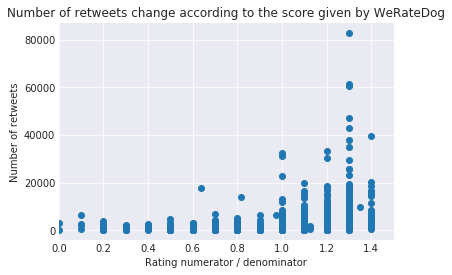

In [5]:
plt.scatter(df_twitter['rating_numerator']/df_twitter['rating_denominator'], df_twitter['retweet_count'])
plt.xlim(0.000000, 1.500000)
plt.title('Number of retweets change according to the score given by WeRateDog')
plt.xlabel('Rating numerator / denominator')
plt.ylabel('Number of retweets');

The scatter plot seems to be left skewed. It seems that the better a dog picture is rated, the more likely it is to have a large number of retweets.   However, this cannot be said with certainty. Maybe the disproportionate ratings (like 1776/10) win retweets also because of the funny aspect of the ratings.

## Insight 2

What are the most common dog breeds represented in WeRateDogs tweets?

In [6]:
print("There are {} breeds in this dataset !".format(df_twitter['pred_breed'].nunique()))

There are 113 breeds in this dataset !


In [7]:
df_twitter['pred_breed'].value_counts()

Golden_retriever                  158
Labrador_retriever                108
Pembroke                          95 
Chihuahua                         91 
Pug                               62 
Toy_poodle                        51 
Chow                              48 
Pomeranian                        42 
Samoyed                           42 
Malamute                          33 
Chesapeake_bay_retriever          31 
French_bulldog                    31 
Cocker_spaniel                    30 
Miniature_pinscher                25 
Eskimo_dog                        22 
Cardigan                          21 
German_shepherd                   21 
Staffordshire_bullterrier         21 
Beagle                            20 
Shih-tzu                          20 
Siberian_husky                    20 
Shetland_sheepdog                 19 
Rottweiler                        19 
Maltese_dog                       19 
Kuvasz                            18 
Lakeland_terrier                  18 
Italian_grey

The most represented dog breeds in WeRateDogs tweets are Golden retriever with 158 tweets, Labrador retriever with 108 tweets, Pembroke with 95 tweets, Chihuahua  with 91 tweets and Pug 62 tweets.

Let's visualize the 15 most represented breeds of dog :

In [8]:
top_breed = list(df_twitter['pred_breed'].value_counts().head(15).index)
top_freq = list(df_twitter['pred_breed'].value_counts().head(15).values)

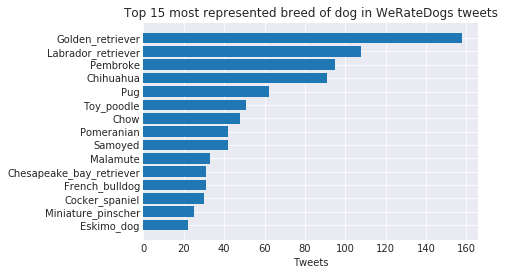

In [9]:
locations = list(range(15))
heights = top_freq

barh_chart_invert(locations, heights, top_breed, 'Top 15 most represented breed of dog in WeRateDogs tweets', 'Tweets')

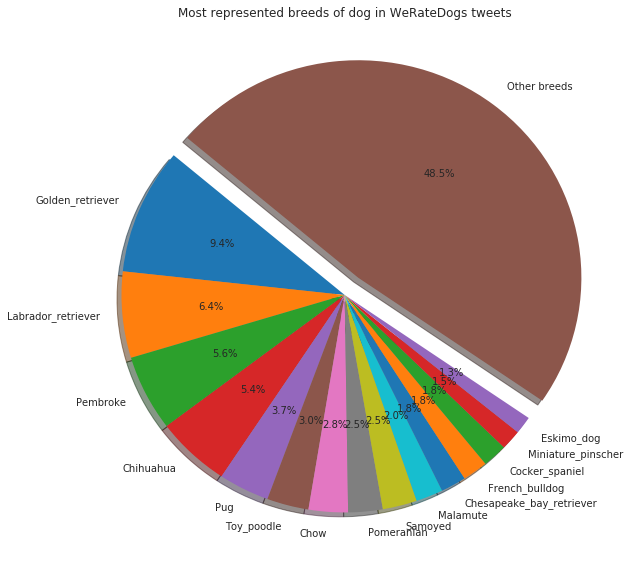

In [10]:
# compute the number of occurrences of the other breeds
top_15_total_breed_occurence = sum(top_freq)
total_breed_occurence = sum(df_twitter['pred_breed'].value_counts())
other_total_breed_occurence = total_breed_occurence - top_15_total_breed_occurence

# pie
locations = list(range(16))
top_freq.append(other_total_breed_occurence)
top_breed.append('Other breeds')
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)

plt.figure(figsize=(10,10)) 
plt.pie(top_freq, labels=top_breed, explode=explode, shadow=True, startangle=140, autopct='%1.1f%%');
plt.title('Most represented breeds of dog in WeRateDogs tweets');

With this pie chart we notice that even though it's the 15 most represented dog breeds, it barely counts for 50\% of all the tweets.

## Insight 3

What is the average length of a WeRateDogs tweet? Does the length of a tweet affect the number of retweet received?

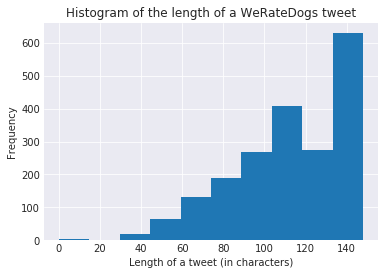

In [11]:
plt.hist(df_twitter['nb_char_txt']);
plt.title('Histogram of the length of a WeRateDogs tweet')
plt.xlabel('Length of a tweet (in characters)')
plt.ylabel('Frequency');

The distribution of the lengths of WeRateDogs tweets is left skewed.

In [12]:
df_twitter['nb_char_txt'].mean(), df_twitter['nb_char_txt'].median()

(111.34453360080241, 116.0)

The average length of a WeRateDogs tweet is 111 characters, with a median of 116.

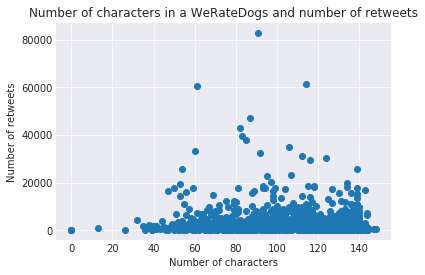

In [13]:
plt.scatter(df_twitter['nb_char_txt'], df_twitter['retweet_count'])
plt.title('Number of characters in a WeRateDogs and number of retweets')
plt.xlabel('Number of characters')
plt.ylabel('Number of retweets');

We can't conclude much looking at this scatter plot, although we can say that tweets with a number of characters betweet 0 and 40 characters seems to have less retweets in general.